In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from cue.utils.plotting import *

In [4]:
style()

## Non-neural

In [5]:
data = np.load('../../data/weightsym.npz')

In [6]:
data.keys()

['t', 'W', 'def_conn_weights', 'decoders', 'post', 'def_post']

### Grad descent

In [7]:
dt = 1e-3
period = (4. * 1200. / 600.) / dt
steps = np.arange(1, len(data['t']) + 1)
t = data['t'][steps % period < 1]

/home/jgosmann/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/mathtext.py:834: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


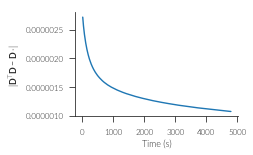

In [8]:
fig = plt.figure(figsize=single_fig_size)
ax = fig.add_subplot(1, 1, 1)

ax.plot(t, np.linalg.norm(data['W'][None, :, :] - data['decoders'], axis=(1, 2)))
ax.set_xlabel("Time (s)")
ax.set_ylabel(r"$\|\mathbf{D}^{\top}\mathbf{D} - \mathbf{D}_*\|$")

sns.despine(fig)
fig.tight_layout()

In [9]:
save_tight_fig(fig, '../../../phd-thesis/figures/aml-grad-err.pdf')

/home/jgosmann/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/mathtext.py:834: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


### Alignment

In [10]:
target = np.einsum('ij,ti->tj', data['def_conn_weights'], data['def_post'])

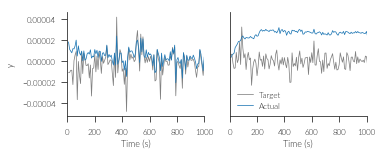

In [11]:
fig = plt.figure(figsize=(textwidth, row_height))

ax1 = fig.add_subplot(1, 2, 1)
i = 402
ax1.plot(t, target[:, i], c='gray', lw=0.75)
ax1.plot(t, data['post'][:, i], lw=0.75)
ax1.set_xlim(0., 1000.)
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("$y$")

ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)
i = 0
ax2.plot(t, target[:, i], c='gray', lw=0.75, label="Target")
ax2.plot(t, data['post'][:, i], lw=0.75, label="Actual")
ax2.set_xlim(0., 1000.)
ax2.set_xlabel("Time (s)")
ax2.yaxis.set_visible(False)
ax2.legend(loc='best')

sns.despine(fig)
fig.tight_layout()

In [12]:
save_tight_fig(fig, '../../../phd-thesis/figures/aml-decode.pdf')

## Neural gradient calculation

In [13]:
data = np.load('../../data/weightsym_neural.npz')

In [14]:
data.keys()

['t',
 'W',
 'def_conn_weights',
 'decoders',
 'post',
 'def_post',
 'act',
 'prod',
 'err',
 'a',
 'b']

### Grad descent

In [15]:
dt = 1e-3
period = .5 / dt
steps = np.arange(1, len(data['t']) + 1)
t = data['t'][steps % period < 1]

/home/jgosmann/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/mathtext.py:834: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


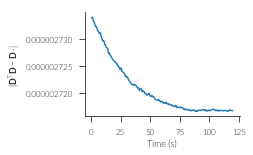

In [16]:
fig = plt.figure(figsize=single_fig_size)
ax = fig.add_subplot(1, 1, 1)

ax.plot(t, np.linalg.norm(data['W'][None, :, :] - data['decoders'], axis=(1, 2)))
ax.set_xlabel("Time (s)")
ax.set_ylabel(r"$\|\mathbf{D}^{\top}\mathbf{D} - \mathbf{D}_*\|$")

sns.despine(fig)
fig.tight_layout()

In [17]:
save_tight_fig(fig, '../../../phd-thesis/figures/aml-neural-grad-err.pdf')

/home/jgosmann/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/mathtext.py:834: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)
